<a href="https://colab.research.google.com/github/pvidya11/Deep_Learning/blob/main/Projects/projrct_04/HyperParameter_Tunning_using_GridSearchCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Artificial Neural Network

# Part 1 - Data Preprocessing

In [130]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [131]:
# Importing the dataset
dataset = pd.read_csv('sample_data/Churn_Modelling.csv')
X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]

#Create dummy variables
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

## Concatenate the Data Frames

X=pd.concat([X,geography,gender],axis=1)

## Drop Unnecessary columns
X=X.drop(['Geography','Gender'],axis=1)


In [132]:

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [133]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [134]:
## Perform Hyperparameter Optimization

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

from keras.models import Sequential
from keras.layers import Dense, Activation, Embedding, Flatten, LeakyReLU, BatchNormalization, Dropout
from keras.activations import relu, sigmoid


In [135]:
def create_model(layers, activation):
    model = Sequential()
    for i, nodes in enumerate(layers):
        if i==0:
            model.add(Dense(nodes,input_dim=X_train.shape[1]))
            model.add(Activation(activation))
            model.add(Dropout(0.3))
        else:
            model.add(Dense(nodes))
            model.add(Activation(activation))
            model.add(Dropout(0.3))
            
    model.add(Dense(units = 1, kernel_initializer= 'glorot_uniform', activation = 'sigmoid')) # Note: no activation beyond this point
    
    model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])
    return model


In [136]:
model = KerasClassifier(build_fn=create_model, verbose=0)


layers = [(20,), (40, 20), (45, 30, 15),(32, 64, 64,32)]
activations = ['sigmoid', 'relu']
param_grid = dict(layers=layers, activation=activations, batch_size = [128, 256], epochs=[30])
grid = GridSearchCV(estimator=model, param_grid=param_grid,cv=5)


In [137]:
grid_result = grid.fit(X_train, y_train)


In [138]:
[grid_result.best_score_,grid_result.best_params_]

[0.8577499866485596,
 {'activation': 'relu',
  'batch_size': 128,
  'epochs': 30,
  'layers': (32, 64, 64, 32)}]

# prepare best model as per above results

[0.8573750019073486,
 {'activation': 'relu',
  'batch_size': 128,
  'epochs': 30,
  'layers': (45, 30, 15)}]

In [154]:
class_model = Sequential()

class_model.add(Dense(units=32,activation="relu",kernel_initializer="he_uniform",input_dim=X_train.shape[1]))
class_model.add(Dropout(rate=0.2))
class_model.add(Dense(units=64,activation="relu",kernel_initializer="he_uniform"))
class_model.add(Dropout(rate=0.2))
class_model.add(Dense(units=64,activation="relu",kernel_initializer="he_uniform"))
class_model.add(Dropout(rate=0.2))
class_model.add(Dense(units=32,activation="relu",kernel_initializer="he_uniform"))

class_model.add(Dense(units=1,activation="sigmoid"))
class_model.compile(optimizer="adam", loss="binary_crossentropy",metrics=["accuracy"])

In [155]:
class_model.summary()

Model: "sequential_865"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2561 (Dense)           (None, 32)                384       
_________________________________________________________________
dropout_1766 (Dropout)       (None, 32)                0         
_________________________________________________________________
dense_2562 (Dense)           (None, 64)                2112      
_________________________________________________________________
dropout_1767 (Dropout)       (None, 64)                0         
_________________________________________________________________
dense_2563 (Dense)           (None, 64)                4160      
_________________________________________________________________
dropout_1768 (Dropout)       (None, 64)                0         
_________________________________________________________________
dense_2564 (Dense)           (None, 32)             

In [156]:
class_model_hist = class_model.fit(X_train, y_train, batch_size=128,epochs=100,validation_split=0.2)

Epoch 1/100
50/50 [==============================] - 1s 7ms/step - loss: 0.9515 - accuracy: 0.6244 - val_loss: 0.4851 - val_accuracy: 0.7975
Epoch 2/100
50/50 [==============================] - 0s 3ms/step - loss: 0.5336 - accuracy: 0.7692 - val_loss: 0.4531 - val_accuracy: 0.8000
Epoch 3/100
50/50 [==============================] - 0s 3ms/step - loss: 0.5018 - accuracy: 0.7892 - val_loss: 0.4353 - val_accuracy: 0.8056
Epoch 4/100
50/50 [==============================] - 0s 4ms/step - loss: 0.4724 - accuracy: 0.7978 - val_loss: 0.4308 - val_accuracy: 0.8150
Epoch 5/100
50/50 [==============================] - 0s 3ms/step - loss: 0.4541 - accuracy: 0.7983 - val_loss: 0.4160 - val_accuracy: 0.8194
Epoch 6/100
50/50 [==============================] - 0s 3ms/step - loss: 0.4541 - accuracy: 0.8047 - val_loss: 0.4115 - val_accuracy: 0.8231
Epoch 7/100
50/50 [==============================] - 0s 3ms/step - loss: 0.4457 - accuracy: 0.8157 - val_loss: 0.4032 - val_accuracy: 0.8306
Epoch 8/100
5

In [157]:
class_model_hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

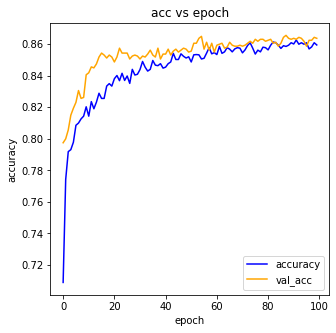

In [158]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.plot(class_model_hist.history["accuracy"], color="blue")
plt.plot(class_model_hist.history["val_accuracy"], color="orange")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend(["accuracy","val_acc"])
plt.title("acc vs epoch")
plt.show()

In [159]:
y_pred = class_model.predict(X_test)

In [160]:
y_pred

array([[0.17820051],
       [0.35227698],
       [0.13423812],
       ...,
       [0.20746806],
       [0.27900177],
       [0.20782292]], dtype=float32)

In [161]:
y_test_1 = y_test.reset_index()

In [162]:
y_test_1["Exited"]

0       0
1       1
2       0
3       0
4       0
       ..
1995    0
1996    0
1997    0
1998    0
1999    0
Name: Exited, Length: 2000, dtype: int64

In [182]:
y_pred = [np.int(i) for i in (y_pred > 0.5)]

In [183]:
from sklearn.metrics import confusion_matrix

In [184]:
cm = confusion_matrix(y_test, y_pred)

In [185]:
import seaborn as sns

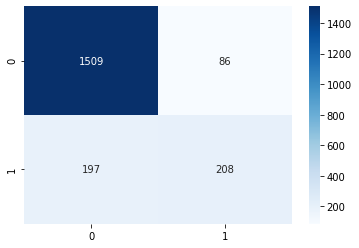

In [186]:
sns.heatmap(cm, cmap="Blues", annot=True, 
            fmt='d')

In [195]:
#Classification Report

from sklearn.metrics import classification_report
cr = classification_report(y_test,y_pred)

In [196]:
print(cr)

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1595
           1       0.71      0.51      0.60       405

    accuracy                           0.86      2000
   macro avg       0.80      0.73      0.75      2000
weighted avg       0.85      0.86      0.85      2000

